In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [154]:
f = lambda t, x: x
df = lambda t, x: -1 * x**3 + np.sin(t)

def euler_step(f, x, t, dt):
    return x + f(t, x) * dt

def rk2_step(f, x, t, dt):
    k1 = f(t, x) * dt
    k2 = dt * f(t + 0.5*dt, x + 0.5*k1)
    return x + k2

def rk4_step(f, x, t, dt):
    k1 = f(t, x) * dt
    k2 = dt * f(t + 0.5*dt, x + 0.5*k1)
    k3 = dt * f(t + 0.5*dt, x + 0.5*k2)
    k4 = dt * f(t + dt, x + k3)
    return x + 1/6*(k1 + 2*k2 + 2*k3 + k4)

In [152]:
?solve_ivp

Signature:
solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    args=None,
    **options,
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a 1-D independent variable (time), y(t) is an
N-D vector-valued function (state), and an N-D
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note
that for stiff ODE solvers, the right-hand side must be
complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
To solve a problem in the complex domain, pass y0 with a complex data type.
Another option always available is to rewrite your pro

In [184]:
N = 10
# N2 = 100
t = np.linspace(0, 10, N)
# t2 = np.linspace(0, 10, N2)
# t = np.sin(np.linspace(0, np.pi/2, 100))**2 *10
x_euler = np.zeros_like(t)
x_rk2 = np.zeros_like(t)
x_rk4 = np.zeros_like(t)
# x_rk4_true = np.zeros_like(t2)
x0 = 0

In [185]:
x_euler[0] = x0
x_rk2[0] = x0
x_rk4[0] = x0
# x_rk4_true[0] = x0
for i in range(1, len(t)):
    x_euler[i] = euler_step(df, x_euler[i-1], t[i-1], t[i] - t[i-1])
    x_rk2[i] = rk2_step(df, x_rk2[i-1], t[i-1], t[i] - t[i-1])
    x_rk4[i] = rk4_step(df, x_rk4[i-1], t[i-1], t[i] - t[i-1])
# for i in range(1, len(t2)):
#     x_rk4_true[i] = rk4_step(df, x_rk4_true[i-1], t2[i-1], t2[i] - t2[i-1])

result = solve_ivp(df, [0, 10], [f(0, x0)], t_eval=t)
x_rk45 = result.y[0]

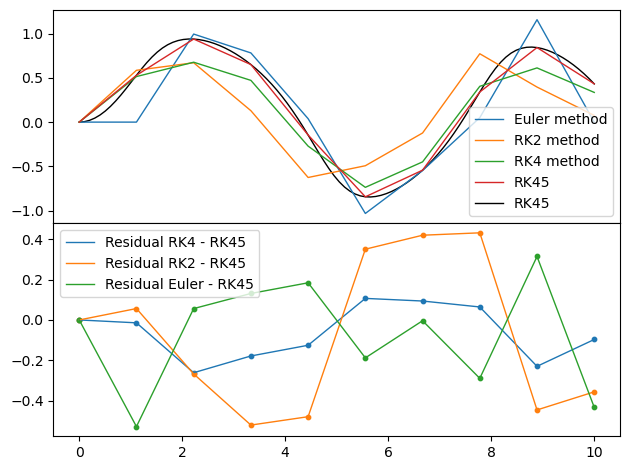

In [190]:
fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(t, x_euler, lw=1, label='Euler method')
# ax[0].scatter(t, x_euler, s=10)
ax[0].plot(t, x_rk2, lw=1, label='RK2 method')
# ax[0].scatter(t, x_rk2, s=10)
ax[0].plot(t, x_rk4, lw=1, label='RK4 method')

ax[0].plot(t, x_rk45, lw=1, label='RK45')
# ax[0].scatter(t, x_rk4, c='k', s=10)
ax[0].plot(t2, x_rk4_true, lw=1, label='RK45', c='k', zorder=-1)



# ax[1].plot(t, x_rk2 - x_euler, lw=1, label='Residual  - Euler')

ax[1].plot(t, x_rk4 - x_rk45, lw=1, label='Residual RK4 - RK45')
ax[1].scatter(t, x_rk4 - x_rk45, s=10)
ax[1].plot(t, x_rk2 - x_rk45, lw=1, label='Residual RK2 - RK45')
ax[1].scatter(t, x_rk2 - x_rk45, s=10)
ax[1].plot(t, x_euler - x_rk45, lw=1, label='Residual Euler - RK45')
ax[1].scatter(t, x_euler - x_rk45, s=10)

# ax[1].plot(t, x_rk4 - x_euler, lw=1, label='Residual RK4 - Euler')
# ax[1].plot(t, x_rk4 - x_rk2, lw=1, label='Residual RK4 - RK2')
# ax[1].scatter(t, x_rk2 - x_euler, s=10)
# ax[1].scatter(t, x_rk4 - x_euler, s=10)
# ax[1].scatter(t, x_rk4 - x_rk2, s=10)

fig.tight_layout()
fig.subplots_adjust(hspace=0)
ax[0].legend()
ax[1].legend()

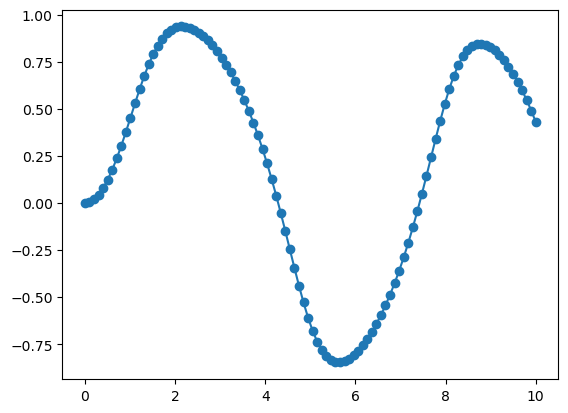

In [38]:
# plt.plot(t, x)
plt.plot(t, x, 'o-')